<a href="https://colab.research.google.com/github/binarymath/Studying_TensorFlow2/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling3D
from keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)


170498071/170498071 [==============================] - 4s 0us/step
x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [6]:
# number of classes

k = len(set(y_train))
print("Number of classes: ", k)

Number of classes:  10


In [10]:
# Build the model using the functional API

i = Input( shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i,x)

In [11]:
# Compile and fit
# Note: make sure you are using GPU for this!

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5865 - accuracy: 0.4219 - val_loss: 1.3295 - val_accuracy: 0.5120
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3107 - accuracy: 0.5268 - val_loss: 1.1761 - val_accuracy: 0.5830
Epoch 3/15
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1823 - accuracy: 0.5734 - val_loss: 1.0704 - val_accuracy: 0.6252
Epoch 4/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0902 - accuracy: 0.6106 - val_loss: 0.9987 - val_accuracy: 0.6456
Epoch 5/15
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0217 - accuracy: 0.6328 - val_loss: 0.9567 - val_accuracy: 0.6604
Epoch 6/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9599 - accuracy: 0.6580 - val_loss: 0.9198 - val_accuracy: 0.6790
Epoch 7/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9061 - accuracy: 0.6785 - val_loss: 0.9235 -

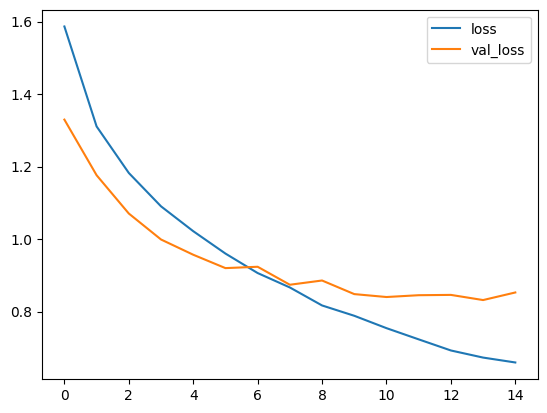

In [12]:
# Plot loss  per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

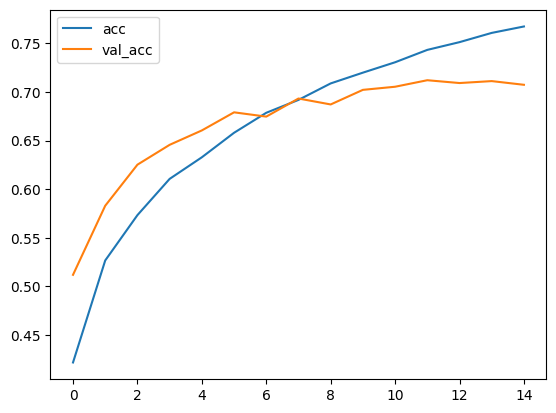

In [13]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 3s 10ms/step
Confusion matrix without normalization
[[757  43  36  13  10   8  10   5  63  55]
 [  5 882   4   8   4   3   5   0  14  75]
 [ 78  15 548  64  93  85  67  17  20  13]
 [ 20  23  55 465  58 223  63  29  16  48]
 [ 23   8  67  53 627  56  64  79  12  11]
 [ 15   8  34 160  39 637  31  49  10  17]
 [  3  13  31  57  28  38 799   6   8  17]
 [ 10   9  42  25  47  73   6 733   4  51]
 [ 73  48   6  11   5  11   2   4 796  44]
 [ 14 111   6   7   2   6   3   7  15 829]]


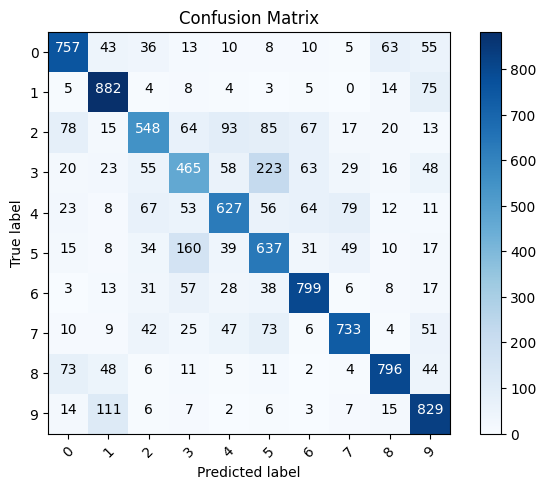

In [25]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix,
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# Assuming you have defined `model`, `x_test`, and `y_test` before this point
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [26]:
# Label mapping

labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: frog  Predicted: deer')

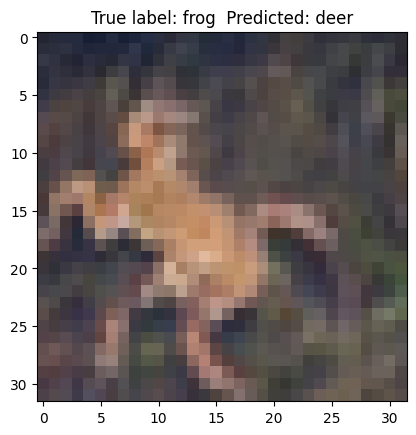

In [28]:
# Show some misclassified  examples
# TODO: add label  names

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s  Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))